### 2

XGBoost Model R²: 0.875
Mean Squared Error (MSE): 0.080


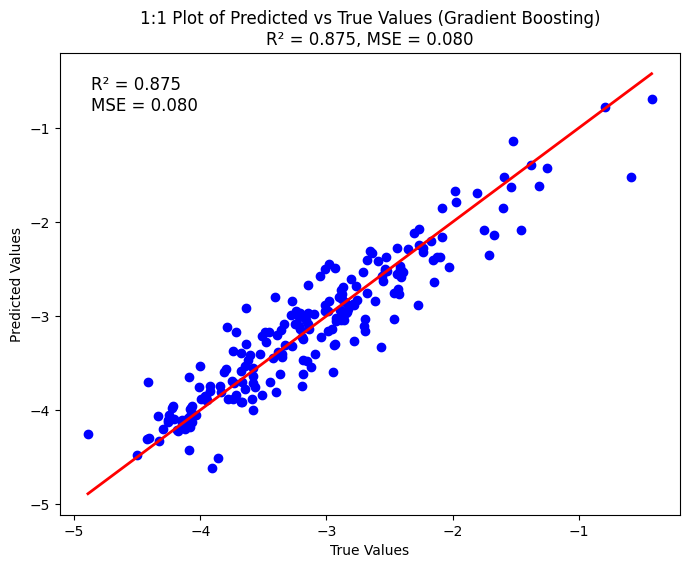

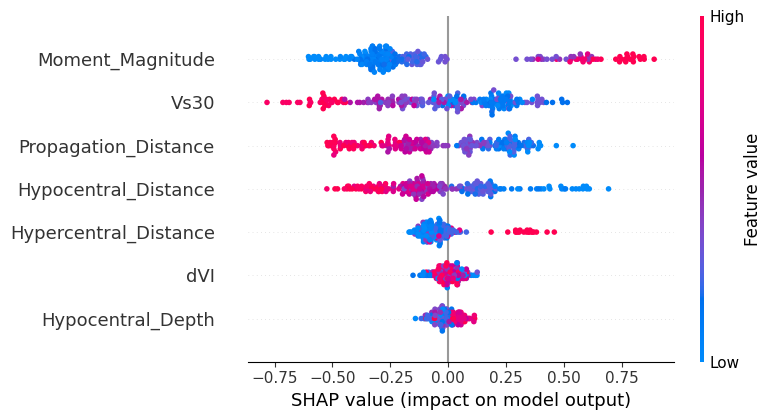

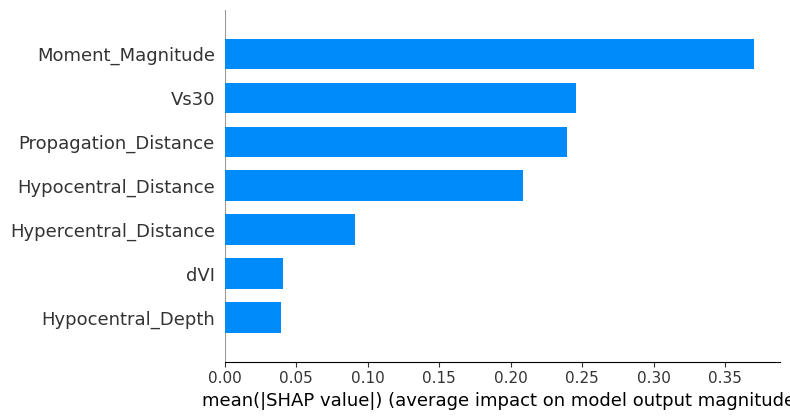

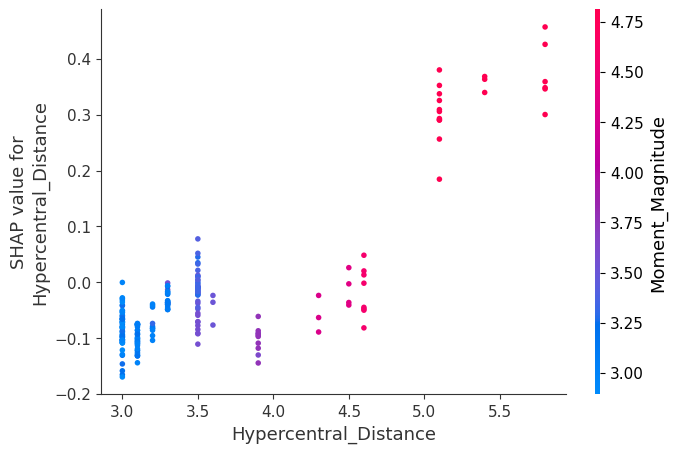

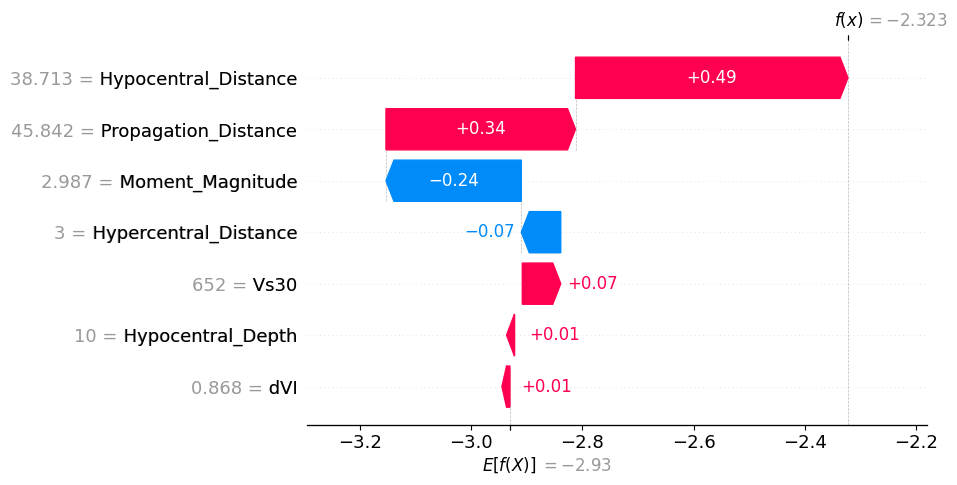

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'1:1 Plot of Predicted vs True Values (Gradient Boosting)\nR² = {r2:.3f}, MSE = {mse:.3f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
# 'shap_values.values' 또는 'shap_values.data' 사용하여 오류 해결
shap.dependence_plot('Hypercentral_Distance', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
shap.waterfall_plot(shap_values[0])


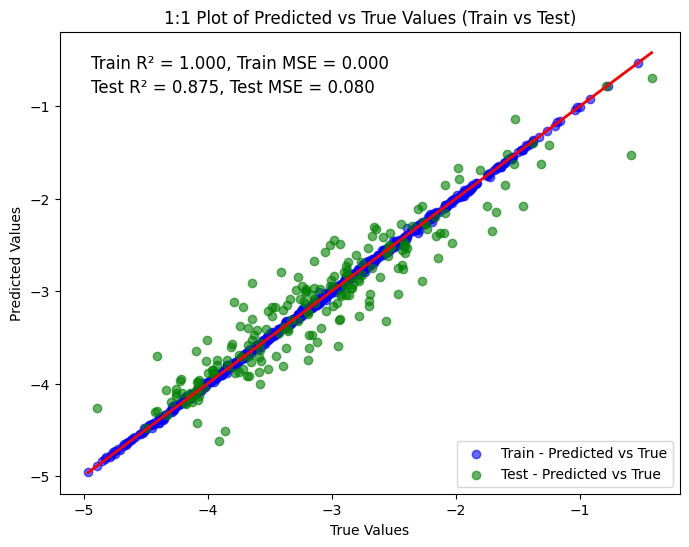

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트에서 정답값 (1열) 선택
o2_data = data['o2']
y_o2 = o2_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i2, y_o2, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


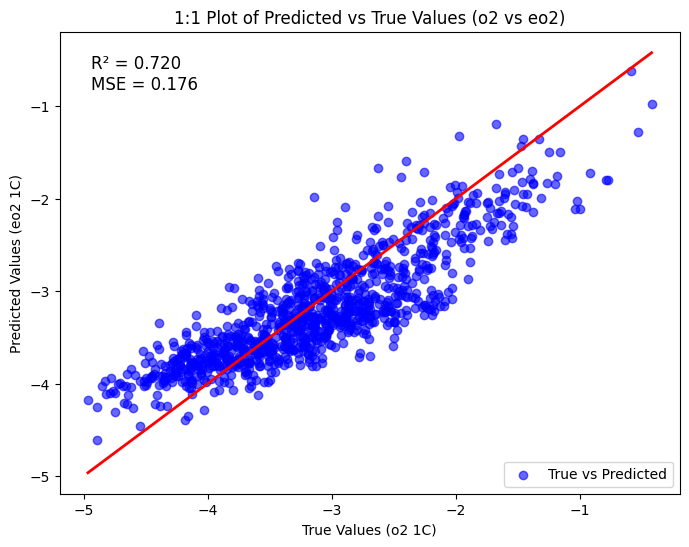

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_2.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i2' 시트에서 입력 변수 선택  
i2_data = data['i2']
X_i2 = i2_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o2' 시트와 'eo2' 시트에서 1열 데이터 선택
o2_data = data['o2']
eo2_data = data['eo2']

# '1C' 열 데이터 추출
y_o2 = o2_data['1c']
y_eo2 = eo2_data['1c']

# R² 점수 계산
r2 = r2_score(y_o2, y_eo2)

# MSE 계산
mse = mean_squared_error(y_o2, y_eo2)

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o2, y_eo2, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o2.min(), y_o2.max()], [y_o2.min(), y_o2.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (o2 vs eo2)')
plt.xlabel('True Values (o2 1C)')
plt.ylabel('Predicted Values (eo2 1C)')

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


### 4

XGBoost Model R²: 0.994
Mean Squared Error (MSE): 0.004


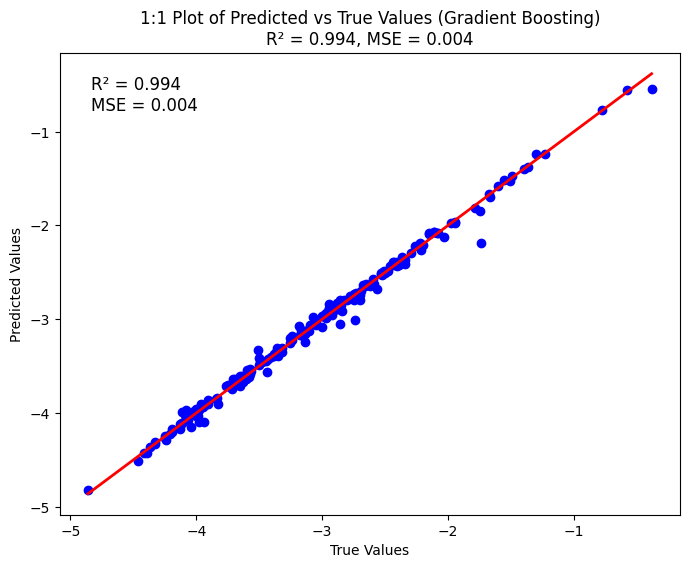

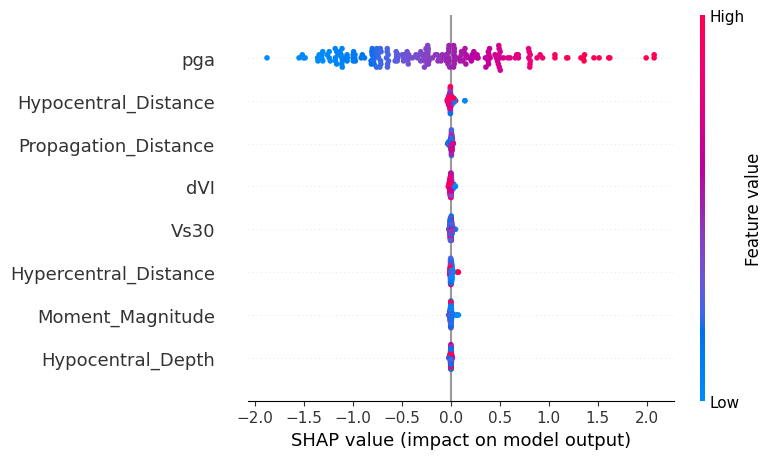

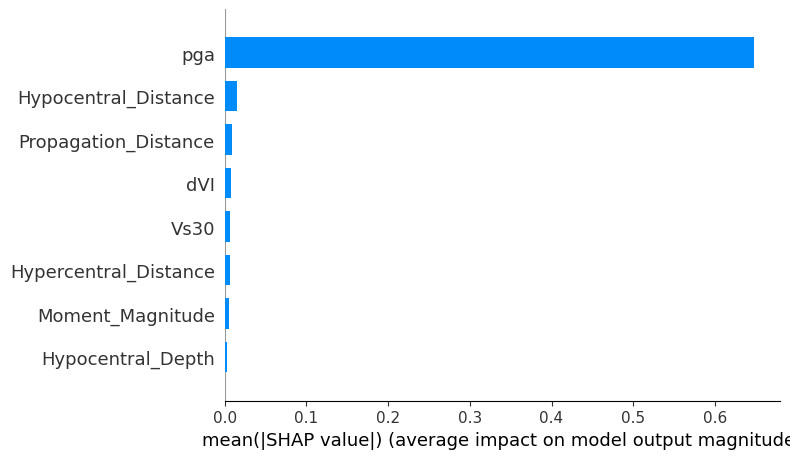

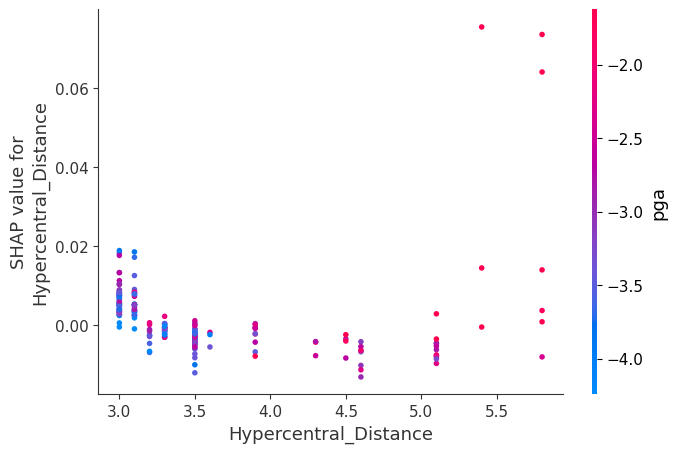

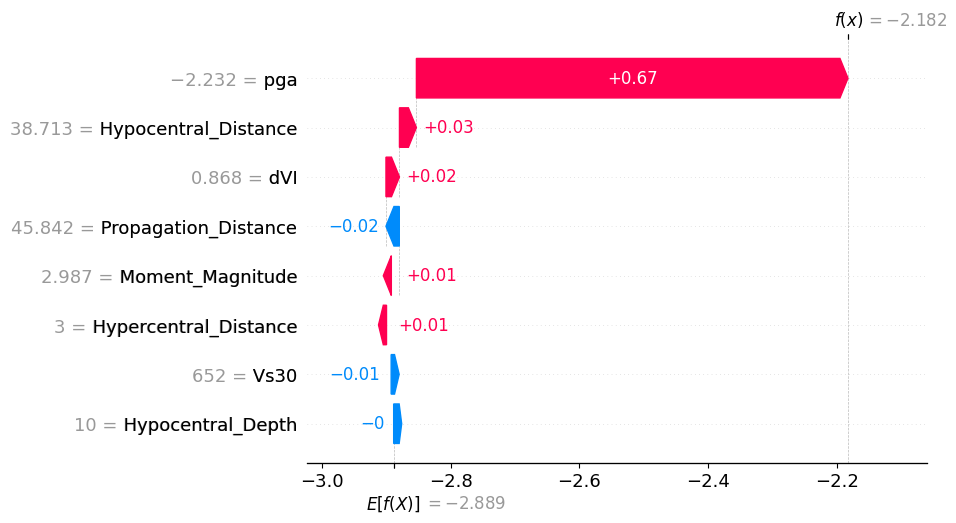

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shap  # SHAP 라이브러리

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# 결과 출력
print(f'XGBoost Model R²: {r2:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title(f'1:1 Plot of Predicted vs True Values (Gradient Boosting)\nR² = {r2:.3f}, MSE = {mse:.3f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

# SHAP 값 계산
shap.initjs()  # Jupyter 환경에서 force plot을 렌더링할 수 있게 해줍니다.
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot (전체 특성 중요도)
shap.summary_plot(shap_values, X_test)

# SHAP Summary Plot (평균 SHAP 값)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# SHAP Force Plot (첫 번째 예측에 대한 Force Plot)
shap.force_plot(shap_values[0])

# SHAP Dependence Plot (특정 변수와 예측 간 관계)
# 'shap_values.values' 또는 'shap_values.data' 사용하여 오류 해결
shap.dependence_plot('Hypercentral_Distance', shap_values.values, X_test)

# SHAP Waterfall Plot (첫 번째 샘플에 대한 중요도 변화)
shap.waterfall_plot(shap_values[0])


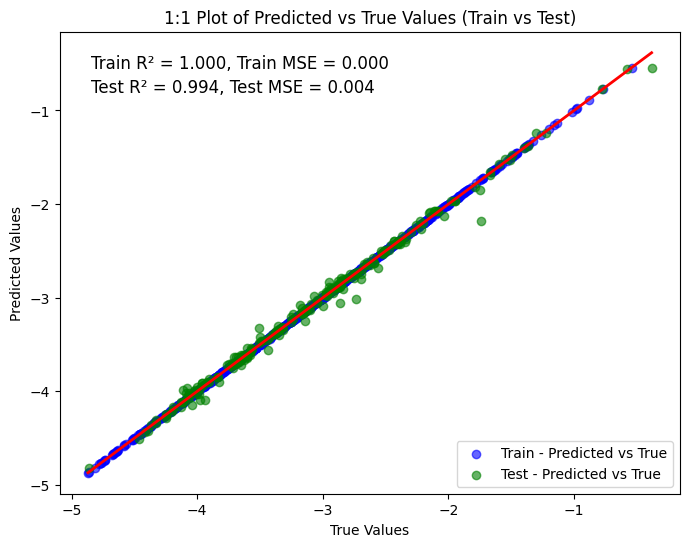

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30', 'pga']]

# 'o4' 시트에서 정답값 (1열) 선택
o4_data = data['o4']
y_o4 = o4_data['1c']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_i4, y_o4, test_size=0.2, random_state=42)

# 그라디언트 부스팅 모델 학습
gb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# R² 점수 계산
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 1대1 플롯 그리기 (훈련 세트와 테스트 세트)
plt.figure(figsize=(8, 6))

# 훈련 세트
plt.scatter(y_train, y_pred_train, color='blue', label='Train - Predicted vs True', alpha=0.6)

# 테스트 세트
plt.scatter(y_test, y_pred_test, color='green', label='Test - Predicted vs True', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (Train vs Test)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# R² 및 MSE를 한 줄로 표시
plt.text(0.05, 0.95, f'Train R² = {r2_train:.3f}, Train MSE = {mse_train:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Test R² = {r2_test:.3f}, Test MSE = {mse_test:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()


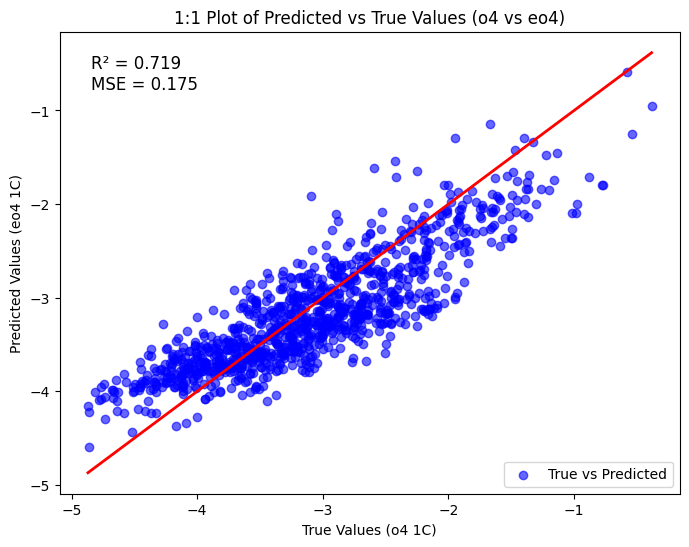

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 로드
file_path = '../earthquake_data/x_nan_4.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path, sheet_name=None)

# 'i4' 시트에서 입력 변수 선택  
i4_data = data['i4']
X_i4 = i4_data[['Hypercentral_Distance', 'Moment_Magnitude', 'Hypocentral_Depth', 'Hypocentral_Distance', 'Propagation_Distance', 'dVI', 'Vs30']]

# 'o4' 시트와 'eo4' 시트에서 1열 데이터 선택
o4_data = data['o4']
eo4_data = data['eo4']

# '1C' 열 데이터 추출
y_o4 = o4_data['1c']
y_eo4 = eo4_data['1c']

# R² 점수 계산
r2 = r2_score(y_o4, y_eo4)

# MSE 계산
mse = mean_squared_error(y_o4, y_eo4)

# 1대1 플롯 그리기
plt.figure(figsize=(8, 6))

# 1대1 플롯 (True 값 vs Predicted 값)
plt.scatter(y_o4, y_eo4, color='blue', label='True vs Predicted', alpha=0.6)

# 1대1 직선
plt.plot([y_o4.min(), y_o4.max()], [y_o4.min(), y_o4.max()], color='red', linewidth=2)

# 제목과 레이블
plt.title('1:1 Plot of Predicted vs True Values (o4 vs eo4)')
plt.xlabel('True Values (o4 1C)')
plt.ylabel('Predicted Values (eo4 1C)')

# R² 및 MSE 표시
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# 범례
plt.legend()

# 그래프 출력
plt.show()
